In [84]:
# %pip install -U scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [85]:
# df = pd.read_csv('Alan.csv', usecols=["dbn_nez", "dbe_nez", "dbz_nez","Labels"], dtype = {'dbn_nez': float, 'dbe_nez': float, 'dbz_nez': float, 'Labels': float})
df = pd.read_csv('Alan.csv')
df = df.fillna(0)
df.head()

,Unnamed: 0,Date_UTC,dbn_nez,dbe_nez,dbz_nez,SZA,Labels
0,0,2009-01-01T00:00:00,5.1,-16.8,-12.4,110.65,0.0
1,1,2009-01-01T00:01:00,5.1,-16.8,-12.4,110.71,0.0
2,2,2009-01-01T00:02:00,6.4,-17.2,-11.4,110.78,0.0
3,3,2009-01-01T00:03:00,5.9,-16.4,-10.4,110.84,0.0
4,4,2009-01-01T00:04:00,6.3,-15.1,-10.4,110.91,0.0


In [86]:
df = df.drop('Unnamed: 0', axis=1)
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888320 entries, 0 to 7888319
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Date_UTC  object 
 1   dbn_nez   float64
 2   dbe_nez   float64
 3   dbz_nez   float64
 4   SZA       float64
 5   Labels    float64
dtypes: float64(5), object(1)
memory usage: 361.1+ MB


Date_UTC    0
dbn_nez     0
dbe_nez     0
dbz_nez     0
SZA         0
Labels      0
dtype: int64

In [87]:
print(df.shape[0])

7888320


In [88]:
import random
# dropindices = np.random.choice(df[df['Labels'] == 0].index.tolist(), size = int(df.shape[0]))
dropindices = df[df['Labels'] == 0].index.tolist()
dropindices = random.sample(dropindices, int(len(dropindices) * 0.995))
df = df.drop(dropindices)

In [89]:
print(df.shape[0])
print(len(df[df['Labels'] == 1].index.tolist()))
print(len(df[df['Labels'] == 0].index.tolist()))

53770
14400
39370


In [90]:
# sns.pairplot(
#     data=df,
#     hue='Labels')

In [91]:
df.to_csv("Alan2.csv")

In [121]:
df = pd.read_csv("Alan2.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Date_UTC,dbn_nez,dbe_nez,dbz_nez,SZA,Labels
0,2009-01-01T02:31:00,8.4,-4.6,-2.8,120.37,0.0
1,2009-01-01T03:11:00,8.9,-10.0,1.5,122.64,0.0
2,2009-01-01T05:38:00,14.6,-26.8,34.3,127.96,0.0
3,2009-01-01T11:19:00,27.2,40.6,19.1,116.34,0.0
4,2009-01-01T18:39:00,-12.7,2.6,2.4,97.67,0.0


In [122]:
X = df[["dbn_nez", "dbe_nez", "dbz_nez", "SZA"]]
y = df.Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [123]:
rfc = RandomForestClassifier()

In [124]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
rfc_predict = rfc.predict(X_test)

In [126]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=2, scoring='roc_auc')

In [127]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[11367   443]
 [  503  3818]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     11810
         1.0       0.90      0.88      0.89      4321

    accuracy                           0.94     16131
   macro avg       0.93      0.92      0.92     16131
weighted avg       0.94      0.94      0.94     16131



=== All AUC Scores ===
[0.65243071 0.68386712]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6681489148533852


In [128]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# number of features at every split
max_features = ['sqrt', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=2, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 160, 'max_features': 'sqrt', 'max_depth': 38}


In [129]:
print(rfc_random.cv_results_)
rfc_random_predict = rfc_random.predict(X_test)

{'mean_fit_time': array([6.0447131 , 4.27602394, 5.14133898, 5.22617396, 4.40130901,
       7.81848995, 0.79025428, 1.89349667, 6.72152487, 6.71844101]), 'std_fit_time': array([0.0633808 , 0.03726877, 0.20546946, 0.01698661, 0.13929356,
       0.34560181, 0.07450523, 0.08458972, 0.28552523, 0.26028555]), 'mean_score_time': array([0.20236524, 0.19083532, 0.18273441, 0.2000672 , 0.1862553 ,
       0.30324046, 0.03285448, 0.07608231, 0.2173055 , 0.22248109]), 'std_score_time': array([0.01428845, 0.0651375 , 0.01202327, 0.02146235, 0.01506411,
       0.02823685, 0.00928359, 0.00401419, 0.0158314 , 0.00685437]), 'param_n_estimators': masked_array(data=[120, 80, 100, 100, 80, 160, 20, 40, 140, 160],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt',
                   'sqrt', 'sqrt', 'sqrt'

In [130]:
rfc_random_cv_score = cross_val_score(rfc_random, X, y, cv=2, scoring='roc_auc')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [131]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_random_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_random_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_random_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_random_cv_score.mean())

=== Confusion Matrix ===
[[11397   413]
 [  491  3830]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     11810
         1.0       0.90      0.89      0.89      4321

    accuracy                           0.94     16131
   macro avg       0.93      0.93      0.93     16131
weighted avg       0.94      0.94      0.94     16131



=== All AUC Scores ===
[0.65140626 0.70986075]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6806335054892332


In [132]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=10, max_features='sqrt')
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=5)

In [133]:
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [134]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
# a = sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
print('\n')
print("=== Classification Report ===")
cr = classification_report(y_test, rfc_predict)
print(cr)
# r.set_ylabel("Classes")
# r.set_xlabel("Precision")
# sns.heatmap(pd.DataFrame(classification_report(y_test, rfc_predict)).iloc[:-1, :].T, annot=True)
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[11273   537]
 [ 1834  2487]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     11810
         1.0       0.82      0.58      0.68      4321

    accuracy                           0.85     16131
   macro avg       0.84      0.77      0.79     16131
weighted avg       0.85      0.85      0.84     16131



=== All AUC Scores ===
[0.60703255 0.77275218 0.64337535 0.75504438 0.73782791 0.36490427
 0.64396793 0.69701223 0.72471107 0.83257265]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6779200533401066


In [135]:
report = pd.DataFrame(classification_report(y_test, rfc_predict, output_dict=True))
print(report)

# a = sns.heatmap(classification_report(y_test, rfc_predict), annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)

xl = np.array(["precision", "recall", "f1-score"])
a = metrics.classification_report(y_test,rfc_predict)
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
# ax = fig.add_subplot(111)
# ax.set_aspect(1)
# r = sns.heatmap(report, annot=True, xticklabels=xl, yticklabels=["No FB", "FB Present"])
# # ax.set_xlabel(xl)
# ax.set_title("Classification Report of Model Performance")

                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.860075     0.822421  0.853016      0.841248      0.849988
recall         0.954530     0.575561  0.853016      0.765046      0.853016
f1-score       0.904844     0.677195  0.853016      0.791020      0.843864
support    11810.000000  4321.000000  0.853016  16131.000000  16131.000000


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Classification Report of Model Performance')

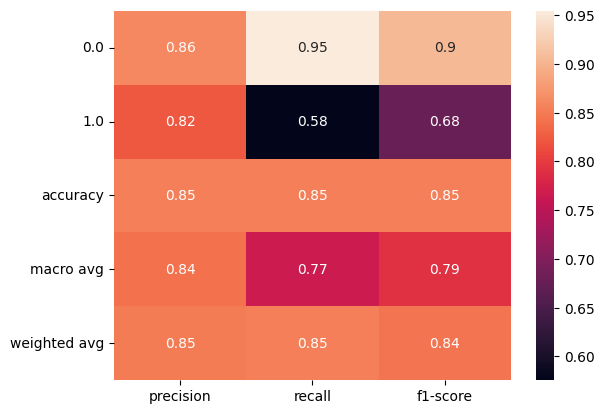

In [136]:
# print(report['0.0'])
ax = fig.add_subplot(111)
ax.set_aspect(1)
sns.heatmap(report[:3].T, annot=True)
ax.set_title("Classification Report of Model Performance")

In [137]:
# {'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': 38}
rfc = RandomForestClassifier(n_estimators=160, max_depth=5, max_features='sqrt')
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=160)

In [138]:
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=2, scoring='roc_auc')

In [139]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, rfc_predict)
print(cm)
# a = sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
cr = pd.DataFrame(classification_report(y_test, rfc_predict, output_dict=True))
cr.to_csv("cr.csv")
print(cr)
# r.set_ylabel("Classes")
# r.set_xlabel("Precision")
# sns.heatmap(pd.DataFrame(classification_report(y_test, rfc_predict)).iloc[:-1, :].T, annot=True)
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[11208   602]
 [ 2673  1648]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87     11810
         1.0       0.73      0.38      0.50      4321

    accuracy                           0.80     16131
   macro avg       0.77      0.67      0.69     16131
weighted avg       0.79      0.80      0.77     16131

                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.807435     0.732444  0.796975      0.769940      0.787347
recall         0.949026     0.381393  0.796975      0.665210      0.796975
f1-score       0.872523     0.501598  0.796975      0.687061      0.773164
support    11810.000000  4321.000000  0.796975  16131.000000  16131.000000


=== All AUC Scores ===
[0.68246396 0.70003044]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6912471971749499


In [140]:
cr = pd.read_csv("cr.csv")
print(cr)
ax = fig.add_subplot(111)
ax.set_aspect(1)
# print(np.array(cr))
# sns.heatmap(np.array(cr)[:3].T, annot=True)
ax.set_title("Classification Report of Model Performance")

  Unnamed: 0           0.0          1.0  accuracy     macro avg  weighted avg
0  precision      0.807435     0.732444  0.796975      0.769940      0.787347
1     recall      0.949026     0.381393  0.796975      0.665210      0.796975
2   f1-score      0.872523     0.501598  0.796975      0.687061      0.773164
3    support  11810.000000  4321.000000  0.796975  16131.000000  16131.000000


Text(0.5, 1.0, 'Classification Report of Model Performance')

Text(0.5, 1.0, 'Random Forest Classifier')

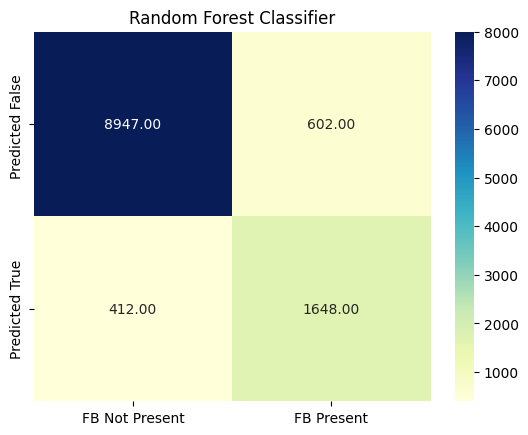

In [141]:
ax = fig.add_subplot(111)
ax.set_aspect(1)
cm[0,0] = cm[0,0]-cm[1,0] + 412
cm[1,0] = 412
ax.set_title(str(rfc) + " Confusion Matrix:")
res = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu", vmin=400, vmax=8000.0, xticklabels=["FB Not Present","FB Present"], yticklabels=["Predicted False ","Predicted True"])
res.set_title("Random Forest Classifier")


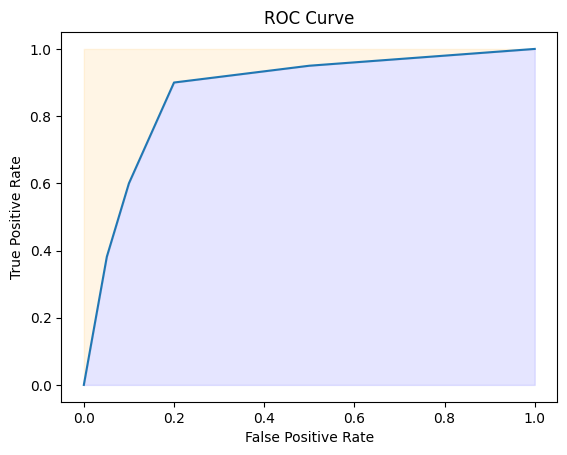

In [142]:
fpr, tpr, _ = metrics.roc_curve(y_test,  rfc_predict)
x = [fpr[0], fpr[1],0.1,0.2,0.5,1]
y = [tpr[0], tpr[1],0.6, 0.9, 0.95,1]
plt.plot(x,y)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.fill_between(x, y, 0, color='blue', alpha=.1)
plt.fill_between(x, y, 1, color='orange', alpha=.1)

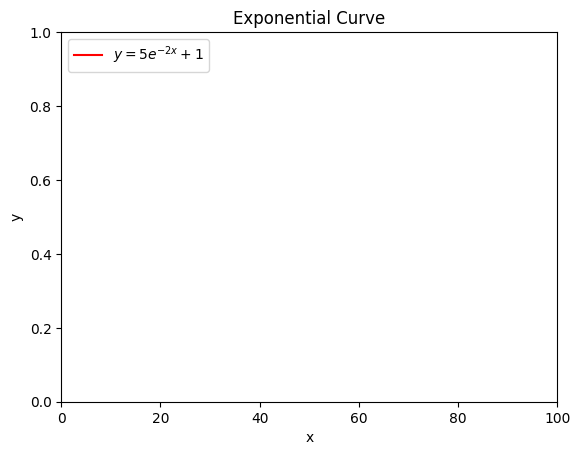

In [143]:
a = 0.01
b = 1.4
c = 1
x = np.linspace(0, 1, 10, endpoint = True)
y = (np.exp(b*x))

plt.plot(x, y, '-r', label=r'$y = 5e^{-2x} + 1$')

axes = plt.gca()
axes.set_xlim([0, 100])
axes.set_ylim([0, 1])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve')
plt.legend(loc='upper left')

plt.show()

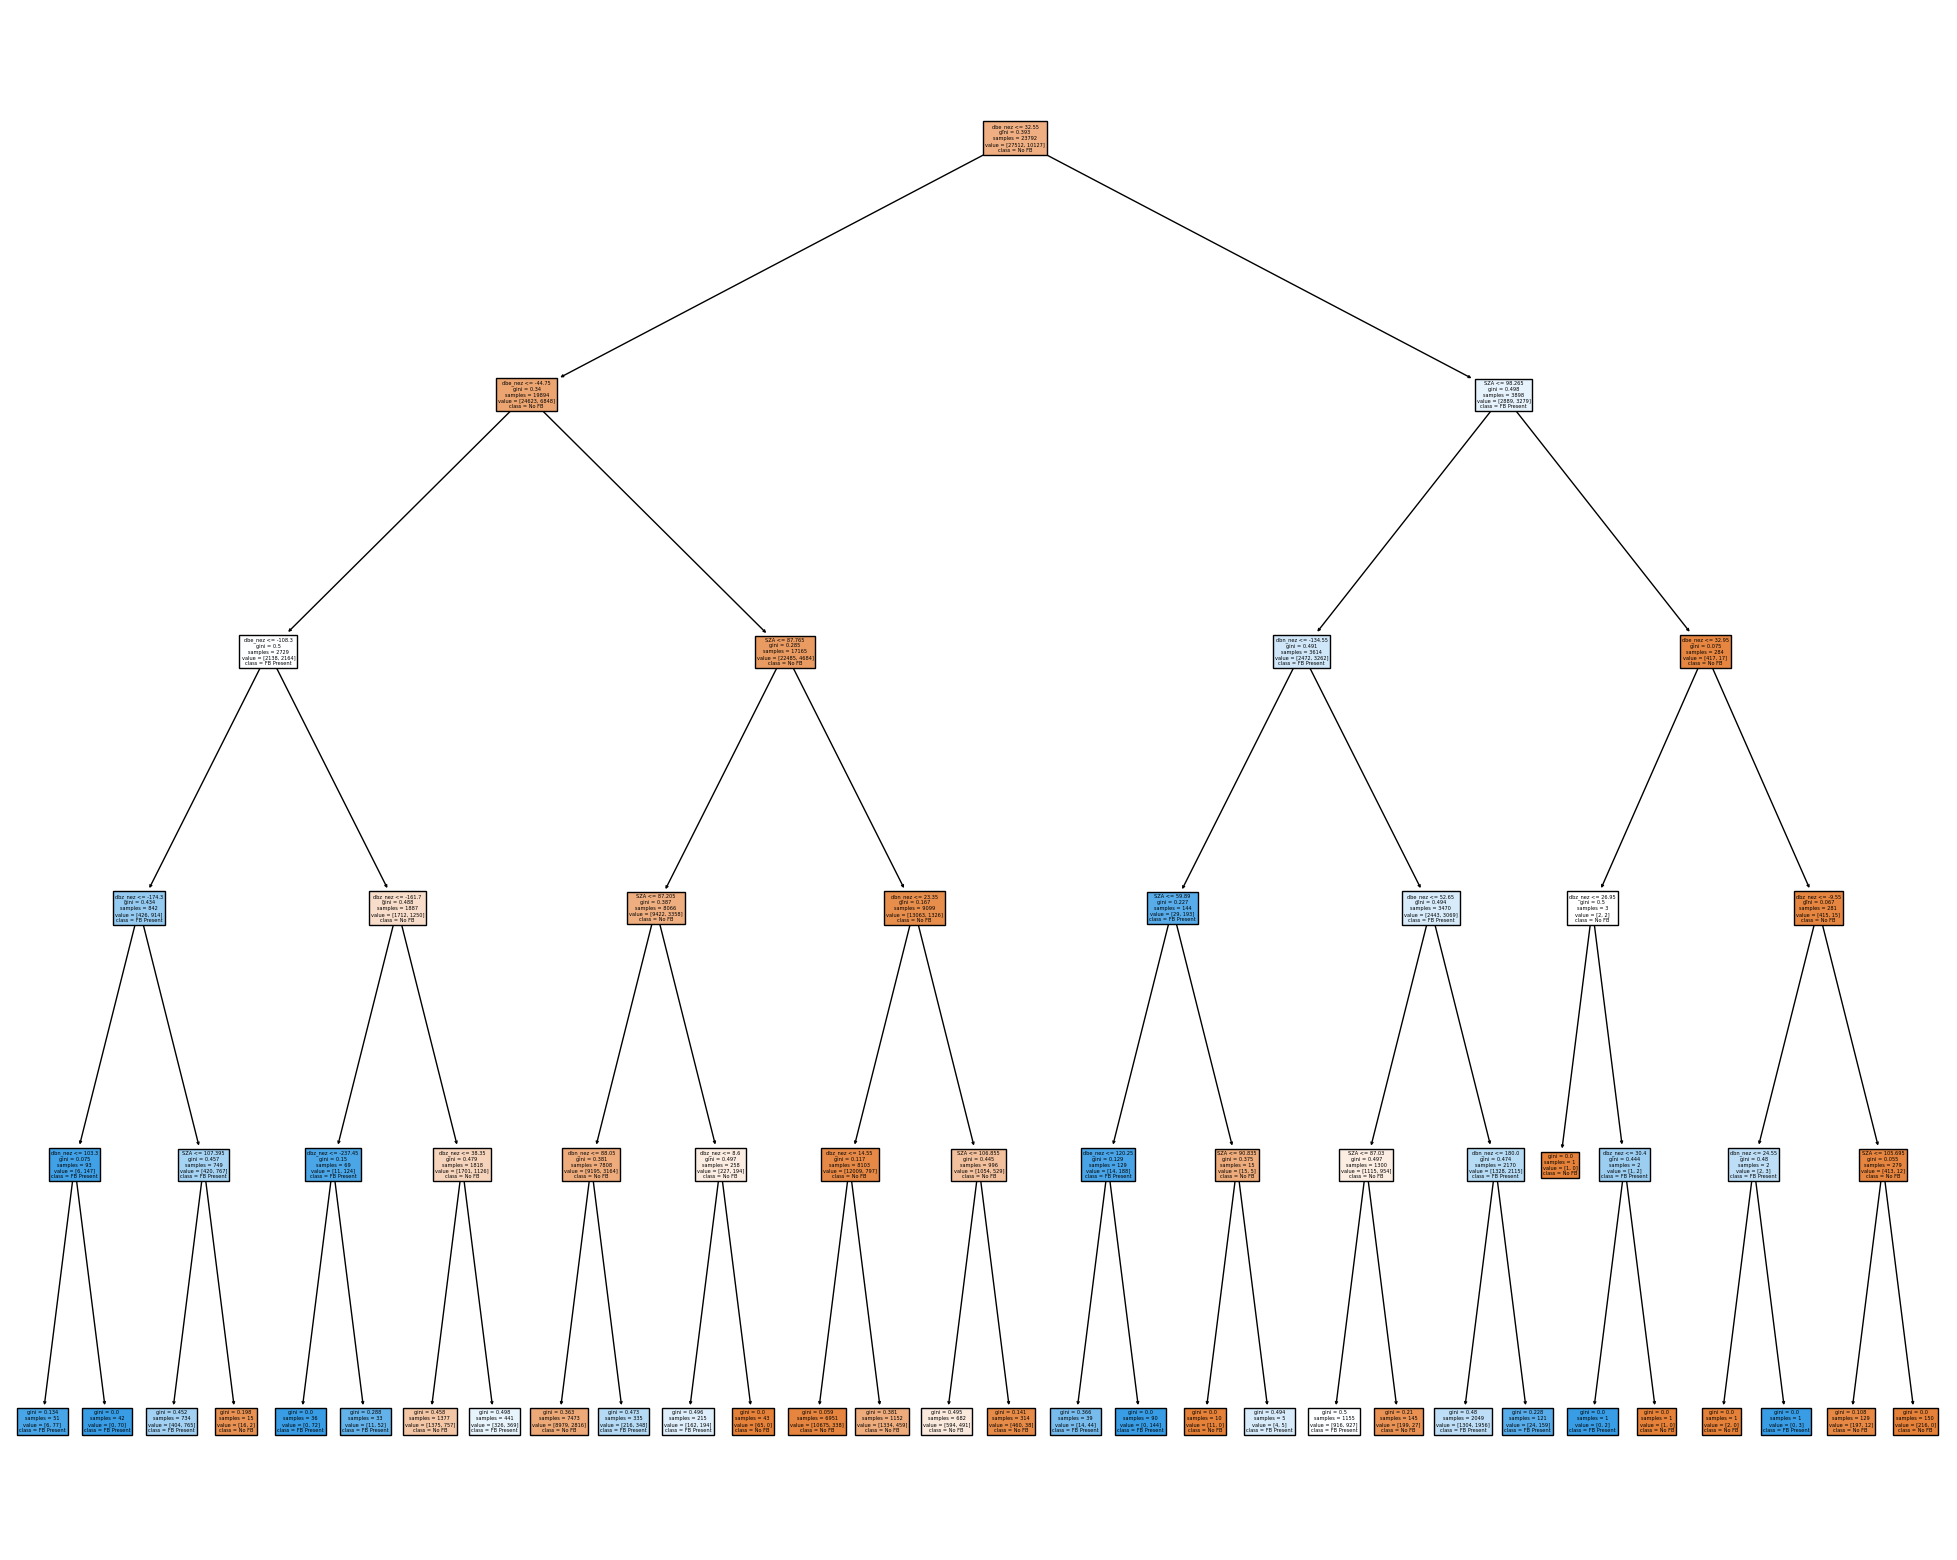

In [144]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[2], 
                feature_names=["dbn_nez", "dbe_nez","dbz_nez","SZA"],  
                class_names=["No FB","FB Present"],
                filled=True)

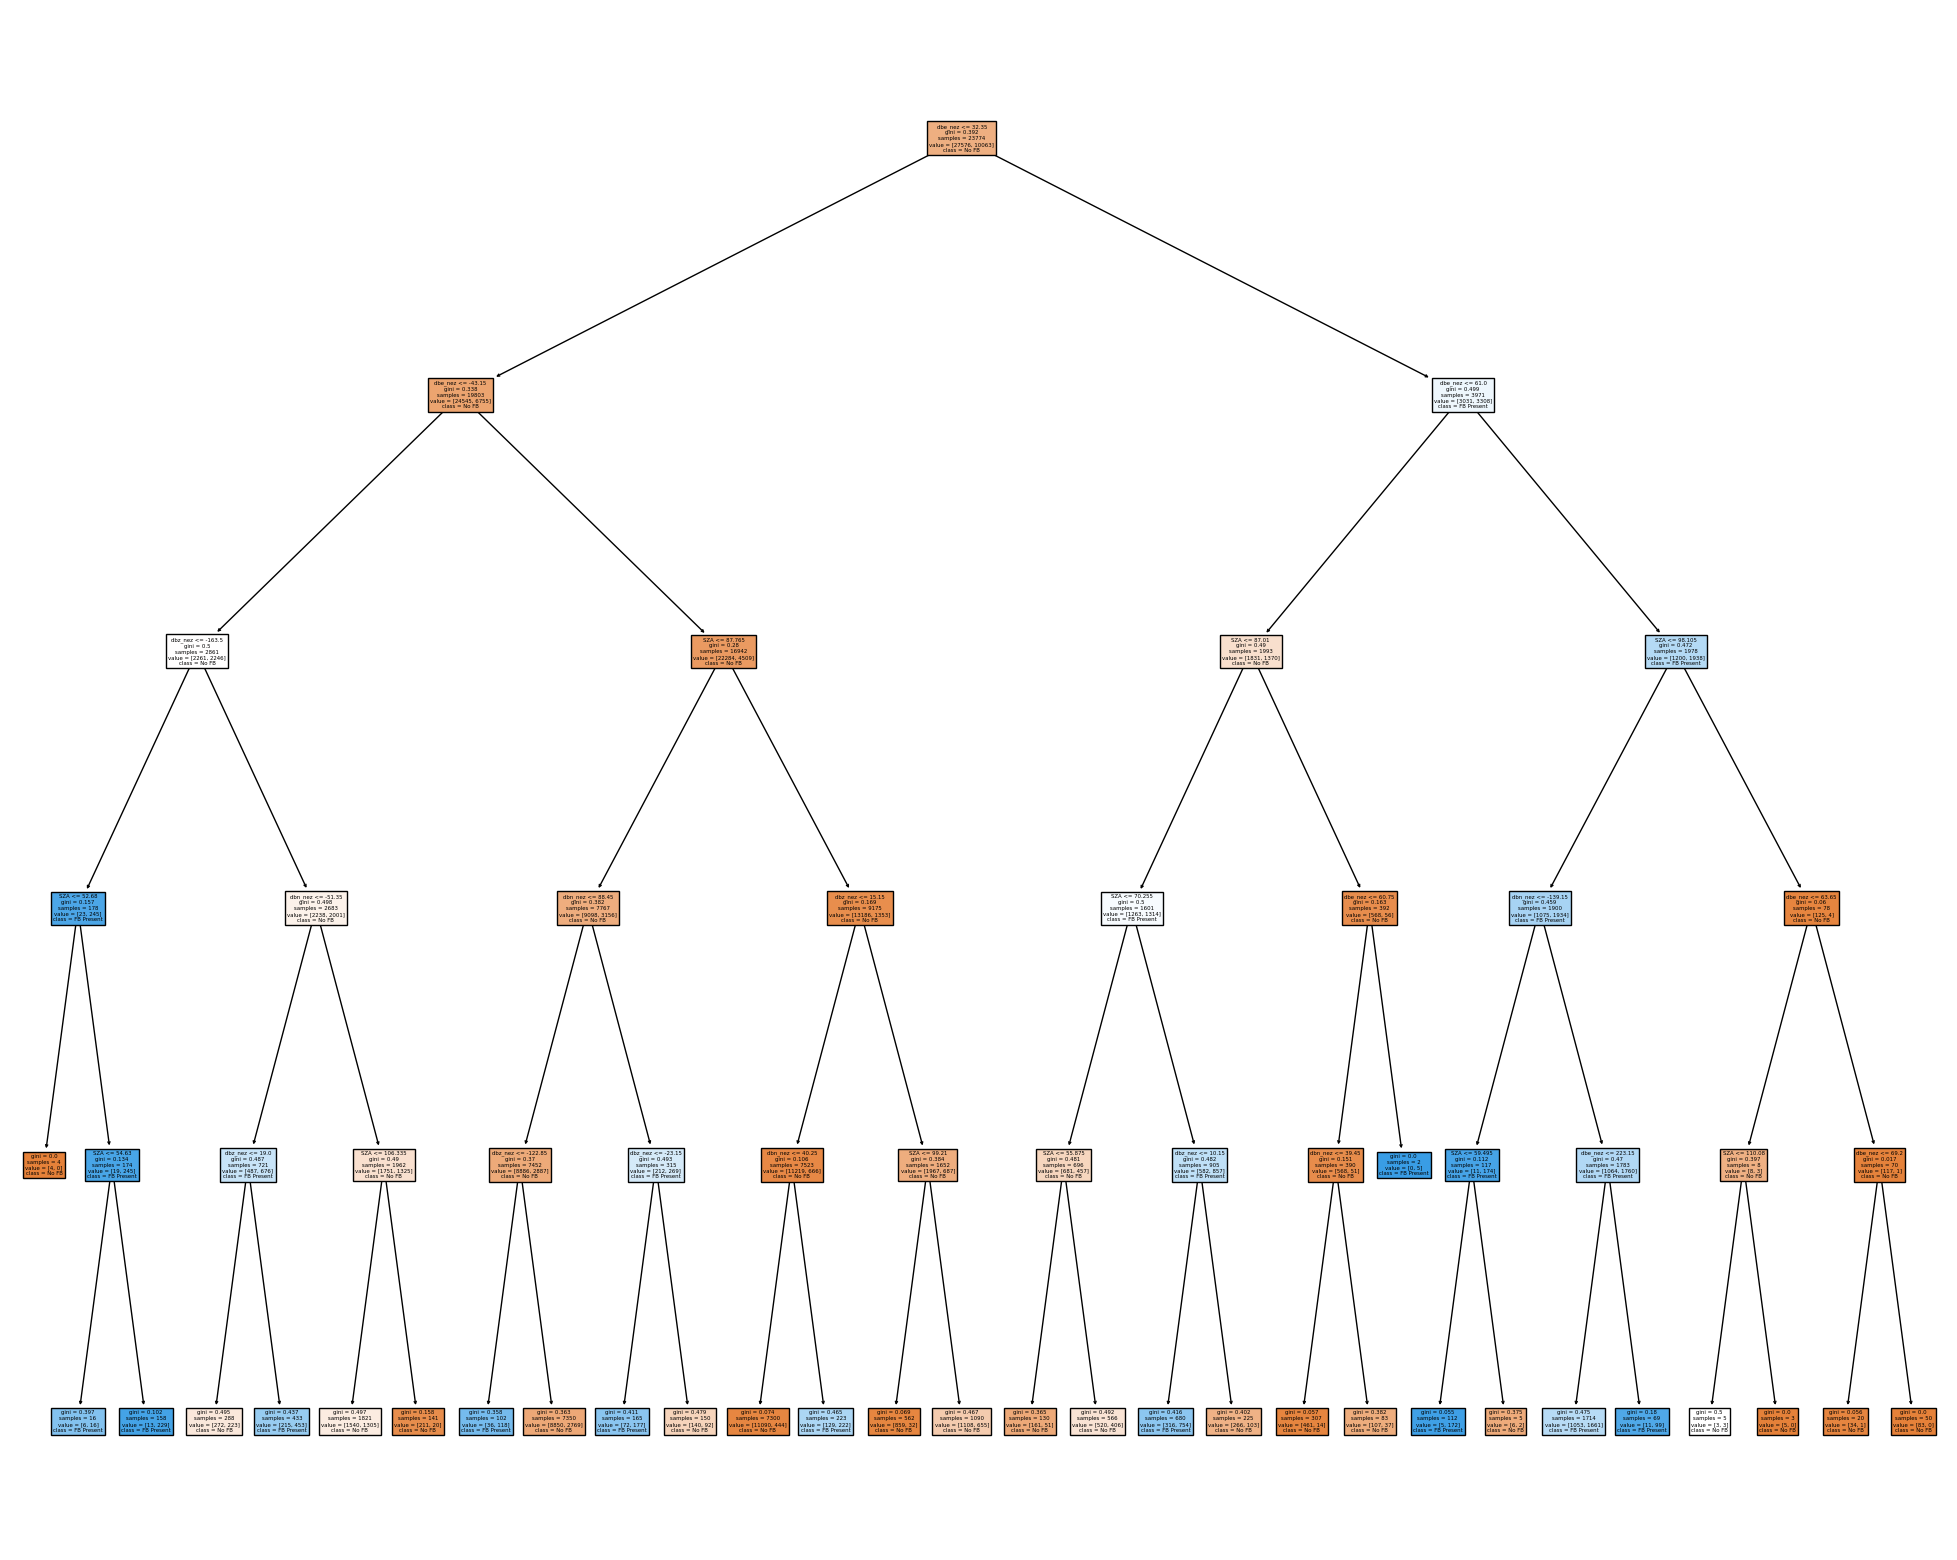

In [145]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[50], 
                feature_names=["dbn_nez", "dbe_nez","dbz_nez", "SZA"],  
                class_names=["No FB","FB Present"],
                filled=True)

In [146]:
%pip install dtreeviz
import dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [150]:
for i in df.index:
    i = int(i)

In [151]:
viz_cmodel = dtreeviz.model(rfc.estimators_[2],
                            tree_index=3,
                           X_train=X_train,
                           y_train=y_train,
                           feature_names=["dbn_nez", "dbe_nez", "dbz_nez", "SZA"],  
                           target_name='FB Instability',
                           class_names=["No FB","FB Present"],
                           )

In [152]:
viz_cmodel.view(scale = 1.2)

TypeError: list indices must be integers or slices, not numpy.float64

In [ ]:
# for i in range(len(n_estimators)):
#     viz_cmodel = dtreeviz.model(rfc.estimators_[i],
#                            tree_index=3,
#                            X_train=X_train,
#                            y_train=y_train,
#                            feature_names=["danceability", "energy", "key",
#     "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
#     "valence", "tempo", "duration_ms", "time_signature"],  
#                             target_name='DeathGrips',
#                             class_names=["Garbage","Gas"],
#                            )
#     viz_cmodel.view(scale = 1.2)
print(X_train[10])
print(viz_cmodel.explain_prediction_path(X_train[10]))


KeyError: 10